In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("gym_members_dataset.csv")
print(data.isnull().sum())
print(data.describe())

Member_ID                    0
Name                        23
Age                         13
Gender                       0
Address                      0
Phone_Number                 0
Membership_Type              0
Join_Date                    9
Last_Visit_Date              0
Favorite_Exercise            0
Avg_Workout_Duration_Min     0
Avg_Calories_Burned         11
Total_Weight_Lifted_kg       8
Visits_Per_Month            12
Churn                        0
dtype: int64
        Member_ID         Age  Avg_Workout_Duration_Min  Avg_Calories_Burned  \
count  150.000000  137.000000                150.000000           139.000000   
mean    75.500000   35.905109                 73.326667           488.309353   
std     43.445368   11.654892                 25.879560           168.649317   
min      1.000000   18.000000                 30.000000           209.000000   
25%     38.250000   25.000000                 53.000000           341.500000   
50%     75.500000   36.000000             

In [13]:
#Extracting relevant features from the dataset
relevant_data=data.drop(['Member_ID','Name','Age','Address','Phone_Number'],axis=1)
print(relevant_data)

     Gender Membership_Type   Join_Date Last_Visit_Date Favorite_Exercise  \
0      Male       Quarterly  2022-07-23      2022-11-03          Pull-ups   
1    Female         Monthly  2023-12-04      2024-02-14            Squats   
2      Male       Quarterly  2024-09-13      2024-12-07       Bench Press   
3      Male         Monthly  2024-06-05      2025-02-24          Pull-ups   
4      Male         Monthly  2022-06-15      2022-12-02       Bench Press   
..      ...             ...         ...             ...               ...   
145    Male       Quarterly  2023-12-10      2024-04-27          Pull-ups   
146  Female         Monthly  2023-02-10      2023-04-02       Bench Press   
147    Male       Quarterly  2023-03-27      2023-12-07          Deadlift   
148  Female         Monthly  2023-05-05      2024-03-26       Bench Press   
149    Male          Yearly  2024-06-02      2025-05-22            Squats   

     Avg_Workout_Duration_Min  Avg_Calories_Burned  Total_Weight_Lifted_kg 

In [14]:
#Handling missing data
print(relevant_data[relevant_data['Join_Date'].isnull() & relevant_data['Last_Visit_Date'].isnull()].shape[0])
extracted=relevant_data.drop(['Join_Date','Last_Visit_Date'],axis=1)
print(extracted)


0
     Gender Membership_Type Favorite_Exercise  Avg_Workout_Duration_Min  \
0      Male       Quarterly          Pull-ups                        93   
1    Female         Monthly            Squats                        37   
2      Male       Quarterly       Bench Press                        98   
3      Male         Monthly          Pull-ups                        66   
4      Male         Monthly       Bench Press                        32   
..      ...             ...               ...                       ...   
145    Male       Quarterly          Pull-ups                        64   
146  Female         Monthly       Bench Press                        95   
147    Male       Quarterly          Deadlift                        80   
148  Female         Monthly       Bench Press                        50   
149    Male          Yearly            Squats                        78   

     Avg_Calories_Burned  Total_Weight_Lifted_kg  Visits_Per_Month Churn  
0                  214

<Axes: xlabel='Avg_Calories_Burned', ylabel='Density'>

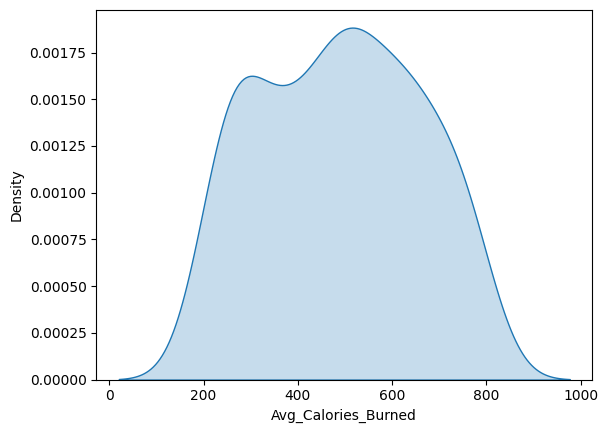

In [15]:
sns.kdeplot(extracted['Avg_Calories_Burned'],fill=True)


<Axes: ylabel='Avg_Calories_Burned'>

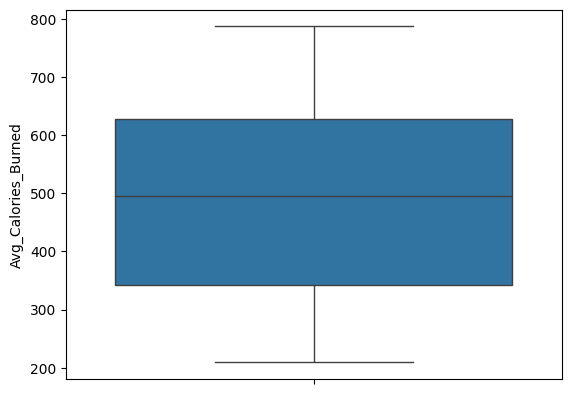

In [16]:
sns.boxplot(extracted['Avg_Calories_Burned'],)

In [17]:
extracted['Avg_Calories_Burned'].median()

np.float64(496.0)

In [18]:
extracted['Avg_Calories_Burned'].skew()

np.float64(0.028039736656372834)

In [19]:
extracted['Avg_Calories_Burned']=extracted['Avg_Calories_Burned'].fillna(extracted['Avg_Calories_Burned'].mean())

In [20]:
extracted['Avg_Calories_Burned'].skew()

np.float64(0.029104680228308068)

In [9]:
extracted['Avg_Calories_Burned'].isnull().sum()

np.int64(0)

In [21]:
extracted['Total_Weight_Lifted_kg'].value_counts()

Total_Weight_Lifted_kg
13995.0    1
4612.0     1
3124.0     1
4586.0     1
16353.0    1
          ..
6082.0     1
7375.0     1
6138.0     1
18336.0    1
12542.0    1
Name: count, Length: 142, dtype: int64

In [22]:
extracted['Favorite_Exercise'].value_counts()

Favorite_Exercise
Deadlift       32
Pull-ups       27
Squats         27
Bench Press    25
Treadmill      25
Cycling        14
Name: count, dtype: int64

In [23]:
extracted.groupby('Favorite_Exercise')['Total_Weight_Lifted_kg'].mean().sort_values(ascending=False)

Favorite_Exercise
Cycling        11272.285714
Pull-ups       10258.538462
Treadmill      10141.173913
Squats          9609.280000
Deadlift        8442.866667
Bench Press     8160.500000
Name: Total_Weight_Lifted_kg, dtype: float64

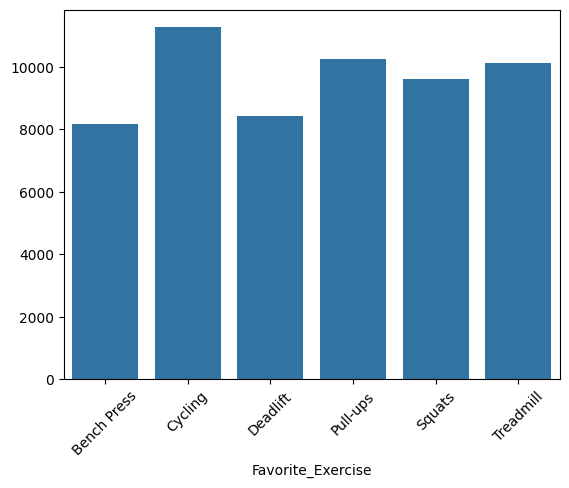

In [27]:
df=extracted
sns.barplot(x=df.groupby('Favorite_Exercise')['T'].mean().index,
            y=df.groupby('Favorite_Exercise')['Total_Weight_Lifted_kg'].mean().values)
plt.xticks(rotation=45)
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
extracted['Churn']=le.fit_transform(extracted['Churn'])



In [36]:
extracted['Gender']=le.fit_transform(extracted['Gender'])

In [41]:
extracted['Membership_Type']=le.fit_transform(extracted['Membership_Type'])

In [39]:
extracted.columns

Index(['Gender', 'Membership_Type', 'Favorite_Exercise',
       'Avg_Workout_Duration_Min', 'Avg_Calories_Burned',
       'Total_Weight_Lifted_kg', 'Visits_Per_Month', 'Churn'],
      dtype='object')

In [42]:
extracted['Membership_Type'].value_counts()

Membership_Type
0    75
1    42
2    33
Name: count, dtype: int64

<Axes: xlabel='Favorite_Exercise', ylabel='count'>

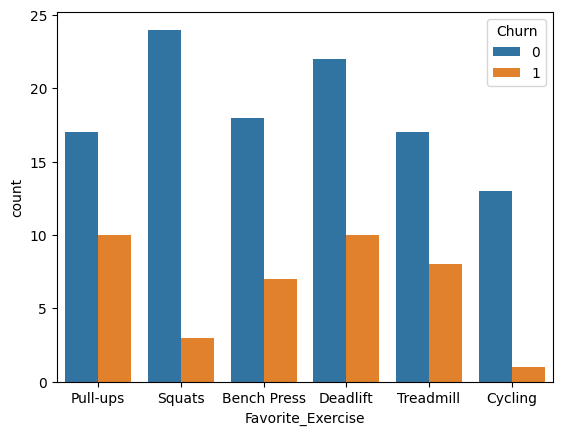

In [35]:
sns.countplot(x='Favorite_Exercise',hue='Churn',data=extracted)

In [45]:
extracted['Favorite_Exercise']=le.fit_transform(extracted['Favorite_Exercise'])

In [46]:
extracted

,Gender,Membership_Type,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
0,1,1,3,93,214.0,13995.0,18.0,0
1,0,0,4,37,436.0,4612.0,11.0,0
2,1,1,0,98,523.0,3124.0,4.0,1
3,1,0,3,66,282.0,4586.0,24.0,0
4,1,0,0,32,522.0,16353.0,18.0,0
...,...,...,...,...,...,...,...,...
145,1,1,3,64,733.0,6082.0,14.0,0
146,0,0,0,95,641.0,7375.0,12.0,0
147,1,1,2,80,471.0,6138.0,14.0,0
148,0,0,0,50,473.0,18336.0,4.0,1


In [49]:
extracted.describe()

,Gender,Membership_Type,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
count,150.000000,150.000000,150.000000,150.000000,150.000000,142.000000,138.000000,150.000000
mean,0.500000,0.720000,2.613333,73.326667,488.309353,9486.978873,14.224638,0.260000
std,0.501675,0.803683,1.674069,25.879560,162.304662,5127.955128,6.385451,0.440104
min,0.000000,0.000000,0.000000,30.000000,209.000000,1009.000000,4.000000,0.000000
25%,0.000000,0.000000,1.000000,53.000000,354.500000,5274.000000,8.000000,0.000000
50%,0.500000,0.500000,3.000000,74.000000,488.309353,9072.500000,14.000000,0.000000
75%,1.000000,1.000000,4.000000,94.500000,616.000000,13620.750000,20.000000,1.000000
max,1.000000,2.000000,5.000000,119.000000,788.000000,19722.000000,24.000000,1.000000


In [60]:
from sklearn.model_selection import train_test_split
X=extracted.iloc[:,:-1]
Y=extracted.iloc[:,-1]

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [67]:
X_train

,Gender,Membership_Type,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month
22,0,2,3,47,625.000000,8994.0,24.0
15,0,1,5,86,542.000000,11803.0,20.0
65,1,1,2,104,404.000000,5576.0,7.0
11,1,1,2,77,529.000000,9532.0,5.0
42,0,0,2,43,263.000000,4829.0,24.0
...,...,...,...,...,...,...,...
71,1,0,0,68,322.000000,NaN,NaN
106,1,1,0,46,550.000000,8663.0,16.0
14,1,0,5,31,488.309353,7611.0,19.0
92,0,0,2,97,365.000000,13503.0,16.0


In [68]:
X_test

,Gender,Membership_Type,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month
73,0,0,2,33,596.000000,7349.0,21.0
18,1,2,2,112,508.000000,2638.0,12.0
118,0,0,0,59,465.000000,4464.0,11.0
78,0,0,1,104,533.000000,12023.0,22.0
76,1,1,4,58,773.000000,9917.0,12.0
31,1,1,1,109,488.309353,8684.0,10.0
64,0,0,5,54,754.000000,18418.0,12.0
141,0,0,0,58,488.309353,2224.0,21.0
68,0,1,2,81,546.000000,3042.0,4.0
82,1,1,4,83,229.000000,10784.0,18.0


In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [77]:
Tree=DecisionTreeClassifier(random_state=42)

In [78]:
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
Y_pred=Tree.predict(X_test)

In [80]:
accuracy=accuracy_score(Y_test,Y_pred)

In [81]:
accuracy

1.0

In [85]:
confusion_matrix=confusion_matrix(Y_test,Y_pred)

In [86]:
classification=classification_report(Y_test,Y_pred)

In [87]:
confusion_matrix

array([[22,  0],
       [ 0,  8]])

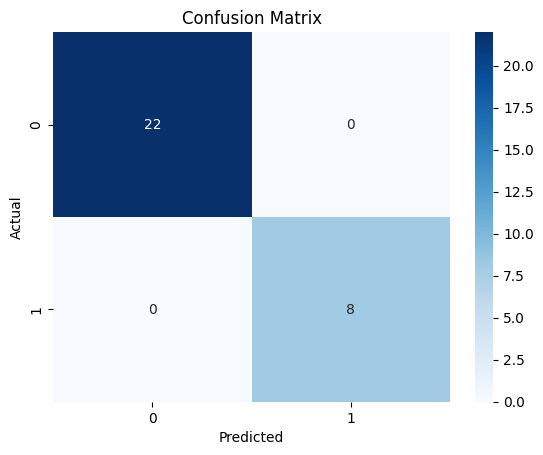

In [88]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()